In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import pickle



In [2]:
%matplotlib inline

In [3]:
import os
import pandas as pd

from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from yellowbrick.classifier import ClassificationReport
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from yellowbrick.datasets import load_game
from yellowbrick.model_selection import LearningCurve

In [4]:
df1 = pd.read_pickle('orig_final_20001.pkl')
type(df1)

pandas.core.frame.DataFrame

In [5]:
len(df1)

20000

In [6]:
pd.set_option('display.max_columns',30)
df1.head()

,credit_score,first_payment_date,maturity_date,msa_code,mi_percent,unit_cnt,occupancy_status,orig_cltv,orig_debt_to_inc,orig_upb,orig_ltv,orig_int_rate,channel,ppm_flag,product_type,property_st,property_type,postal_code,ln_seq_number,ln_purpose,orig_ln_term,borrower_cnt,seller_name,servicer_name,yr1_def,yr3_def,yr5_def,curr_ln_delq_stas_1yr,curr_ln_delq_stas_3yr,curr_ln_delq_stas_5yr
0,799.0,201708,203707,33340.0,0.0,1.0,P,65.0,31.0,230000.0,65.0,4.0,R,N,FRM,WI,SF,53100.0,F117Q2000001,C,240,2,Other sellers,"PNCBANK,NATL",0,0,0,0,0,0
1,794.0,201708,204707,43580.0,0.0,1.0,I,73.0,44.0,80000.0,73.0,5.0,R,N,FRM,IA,SF,51000.0,F117Q2000002,C,360,1,Other sellers,Other servicers,0,0,0,0,0,0
2,806.0,201708,204707,0.0,0.0,1.0,P,48.0,42.0,63000.0,48.0,4.0,R,N,FRM,KS,SF,67900.0,F117Q2000003,N,360,1,Other sellers,Other servicers,0,0,0,0,0,0
3,751.0,201707,203206,33460.0,0.0,1.0,P,80.0,16.0,424000.0,80.0,3.0,R,N,FRM,MN,SF,55000.0,F117Q2000004,C,180,2,Other sellers,Other servicers,0,0,0,0,0,0
4,751.0,201707,203206,33460.0,0.0,1.0,I,75.0,15.0,100000.0,75.0,4.0,R,N,FRM,MN,CO,55100.0,F117Q2000005,N,180,2,Other sellers,Other servicers,0,0,0,0,0,0


In [7]:
df1.describe()

,credit_score,msa_code,mi_percent,unit_cnt,orig_cltv,orig_debt_to_inc,orig_upb,orig_ltv,orig_int_rate,postal_code,yr1_def,yr3_def,yr5_def,curr_ln_delq_stas_1yr,curr_ln_delq_stas_3yr,curr_ln_delq_stas_5yr
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.00000,20000.000000,20000.0
mean,748.080334,25238.124400,6.982600,1.036250,75.079750,34.546850,221398.650000,74.765300,4.274350,56338.635000,0.02595,0.032600,0.032600,0.02595,0.006650,0.0
std,45.322264,15441.669582,11.932607,0.256006,16.351702,9.585213,117595.115795,16.393058,0.573061,28105.915942,0.15899,0.202828,0.202828,0.15899,0.081278,0.0
min,549.000000,0.000000,0.000000,1.000000,9.000000,1.000000,15000.000000,9.000000,3.000000,600.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.0
25%,716.000000,14500.000000,0.000000,1.000000,68.000000,28.000000,130000.000000,67.000000,4.000000,33300.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.0
50%,755.000000,27260.000000,0.000000,1.000000,80.000000,36.000000,200000.000000,80.000000,4.000000,56300.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.0
75%,786.000000,38900.000000,12.000000,1.000000,85.000000,42.000000,295000.000000,85.000000,5.000000,81000.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.0
max,827.000000,49740.000000,35.000000,4.000000,95.000000,50.000000,938000.000000,95.000000,6.000000,99900.000000,1.00000,2.000000,2.000000,1.00000,1.000000,0.0


In [8]:
pd.options.display.float_format = '{:.2f}'.format
df1.describe()

,credit_score,msa_code,mi_percent,unit_cnt,orig_cltv,orig_debt_to_inc,orig_upb,orig_ltv,orig_int_rate,postal_code,yr1_def,yr3_def,yr5_def,curr_ln_delq_stas_1yr,curr_ln_delq_stas_3yr,curr_ln_delq_stas_5yr
count,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00
mean,748.08,25238.12,6.98,1.04,75.08,34.55,221398.65,74.77,4.27,56338.64,0.03,0.03,0.03,0.03,0.01,0.00
std,45.32,15441.67,11.93,0.26,16.35,9.59,117595.12,16.39,0.57,28105.92,0.16,0.20,0.20,0.16,0.08,0.00
min,549.00,0.00,0.00,1.00,9.00,1.00,15000.00,9.00,3.00,600.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,716.00,14500.00,0.00,1.00,68.00,28.00,130000.00,67.00,4.00,33300.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,755.00,27260.00,0.00,1.00,80.00,36.00,200000.00,80.00,4.00,56300.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,786.00,38900.00,12.00,1.00,85.00,42.00,295000.00,85.00,5.00,81000.00,0.00,0.00,0.00,0.00,0.00,0.00
max,827.00,49740.00,35.00,4.00,95.00,50.00,938000.00,95.00,6.00,99900.00,1.00,2.00,2.00,1.00,1.00,0.00


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


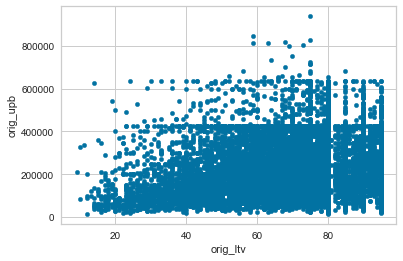

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
df1.plot("orig_ltv", "orig_upb", kind= "scatter")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000278A6CDD2B0>,
      dtype=object)

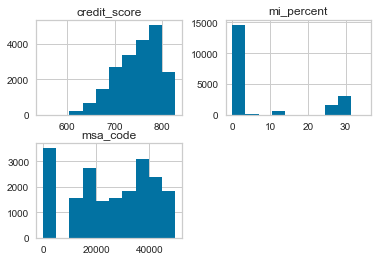

In [10]:
df1.hist(column = ["credit_score","msa_code","mi_percent"])

In [11]:
df1.dtypes

credit_score             float64
first_payment_date        object
maturity_date             object
msa_code                 float64
mi_percent               float64
unit_cnt                 float64
occupancy_status          object
orig_cltv                float64
orig_debt_to_inc         float64
orig_upb                 float64
orig_ltv                 float64
orig_int_rate            float64
channel                   object
ppm_flag                  object
product_type              object
property_st               object
property_type             object
postal_code              float64
ln_seq_number             object
ln_purpose                object
orig_ln_term              object
borrower_cnt              object
seller_name               object
servicer_name             object
yr1_def                    int16
yr3_def                    int16
yr5_def                    int16
curr_ln_delq_stas_1yr      int16
curr_ln_delq_stas_3yr      int16
curr_ln_delq_stas_5yr      int16
dtype: obj

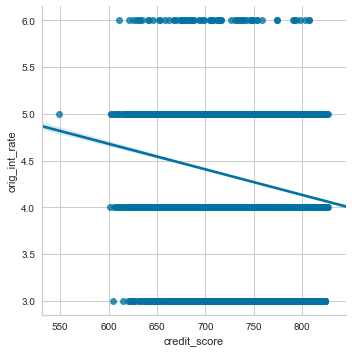

In [12]:
sns.lmplot(x = "credit_score", y = "orig_int_rate", data=df1 )    

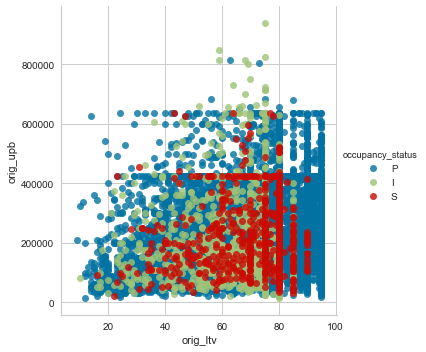

In [13]:
sns.lmplot(y="orig_upb", x="orig_ltv", data=df1, fit_reg=False, hue="occupancy_status")

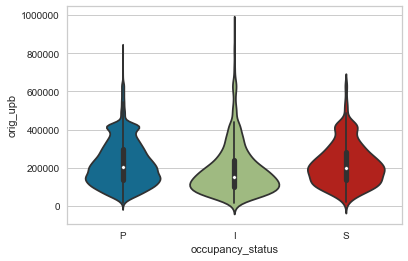

In [14]:
sns.set_style("whitegrid")
sns.violinplot(x="occupancy_status", y="orig_upb", data=df1)

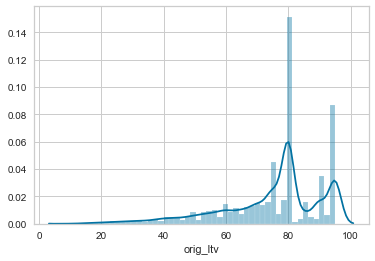

In [15]:
sns.distplot(df1["orig_ltv"])

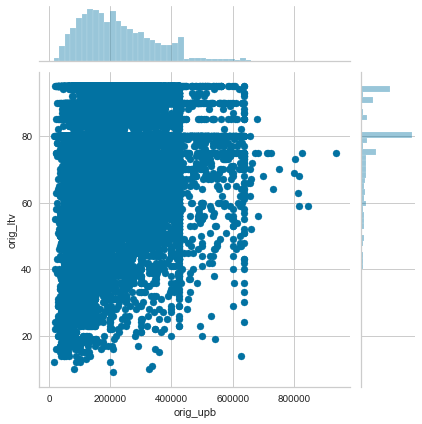

In [16]:
sns.jointplot(df1["orig_upb"], df1["orig_ltv"])

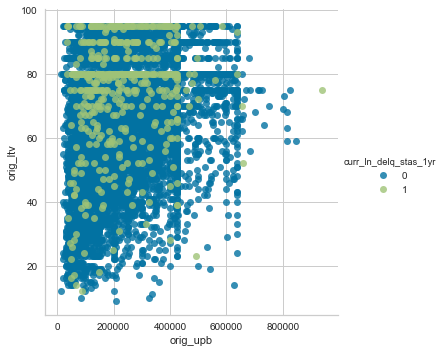

In [17]:
sns.lmplot(x="orig_upb", y="orig_ltv", data=df1, fit_reg=False, hue="curr_ln_delq_stas_1yr")

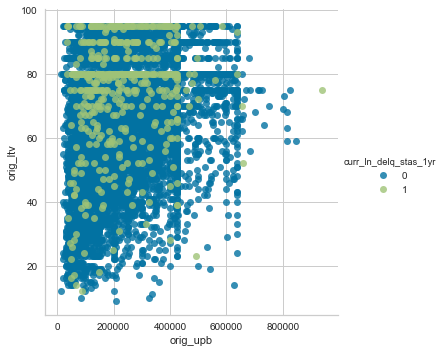

In [18]:
sns.lmplot(x="orig_upb", y="orig_ltv", data=df1, fit_reg=False, hue="curr_ln_delq_stas_1yr")

In [20]:

dataset=df1
features = ['credit_score','orig_upb','msa_code','mi_percent','orig_ltv','orig_int_rate','postal_code','orig_ln_term']
target   = ['yr1_def']

X = dataset[features]
y = dataset[target]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


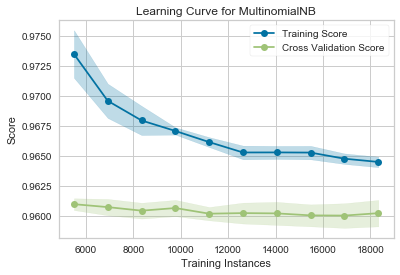

In [21]:
# Encode the categorical data
X = OneHotEncoder().fit_transform(X)
y = LabelEncoder().fit_transform(y)

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer
model = MultinomialNB()
visualizer = LearningCurve(
    model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=6
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [22]:
dataset=df1
features = ['credit_score','orig_upb','msa_code','mi_percent','orig_ltv','orig_int_rate','postal_code','orig_ln_term']
target   = ['yr3_def']
X = dataset[features]
y = dataset[target]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


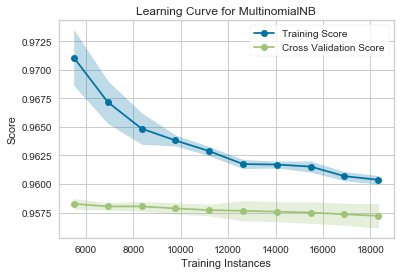

In [23]:
# Encode the categorical data
X = OneHotEncoder().fit_transform(X)
y = LabelEncoder().fit_transform(y)

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer
model = MultinomialNB()
visualizer = LearningCurve(
    model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=6
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [24]:
dataset=df1
features = ['credit_score','orig_upb','msa_code','mi_percent','orig_ltv','orig_int_rate','postal_code','orig_ln_term']
target   = ['yr5_def']

X = dataset[features]
y = dataset[target]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


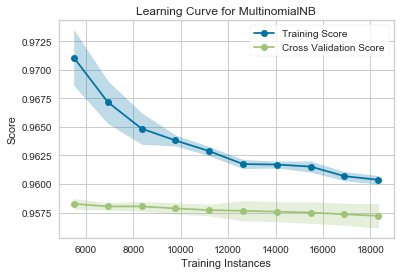

In [25]:
# Encode the categorical data
X = OneHotEncoder().fit_transform(X)
y = LabelEncoder().fit_transform(y)

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer
model = MultinomialNB()
visualizer = LearningCurve(
    model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=6
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [26]:
dataset=df1
features = ['credit_score','orig_upb','msa_code','mi_percent','orig_ltv','orig_int_rate','postal_code','orig_ln_term']
target   = ["yr5_def"]

X = dataset[features]
y = dataset[target]

In [27]:
def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """ 
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
         ('one_hot_encoder', OneHotEncoder()), 
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y.ravel(), **kwargs)  
    
    expected  = y
    predicted = model.predict(X)
    
    # Compute and return F1 (harmonic mean of precision and recall)
    print("{}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted,average='weighted')))# Try them all!

models = [
    SVC(gamma='auto')
]

for model in models:
    score_model(X, y, model)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


SVC: 0.9584959334753068


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
# Try them all!

models = [
    SVC(gamma='auto')
]

for model in models:
    score_model(X, y, model)
    
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


SVC: 0.9584959334753068


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
# Try them all!

models = [
    SVC(gamma='auto'), LinearSVC(), 
    SGDClassifier(max_iter=100, tol=1e-3), KNeighborsClassifier(), 
    LogisticRegression(solver='lbfgs'), LogisticRegressionCV(cv=3), 
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=100), 
    RandomForestClassifier(n_estimators=100)
]

for model in models:
    score_model(X, y, model)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0

SVC: 0.9584959334753068
LinearSVC: 0.9637151300737514


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0

SGDClassifier: 0.9584959334753068
KNeighborsClassifier: 0.9597159229954324


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.2

LogisticRegression: 0.9589641636188028


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.2

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

LogisticRegressionCV: 0.9584959334753068
BaggingClassifier: 0.993022633559548


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


ExtraTreesClassifier: 1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


RandomForestClassifier: 1.0
